In [1]:
import time
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import DBSCAN
from pathlib import Path
from ast import literal_eval
from pandarallel import pandarallel
from umap import UMAP
from sklearn.manifold import TSNE
import plotly.graph_objects as go
import plotly.express as px



/Users/ckosonocky/opt/anaconda3/envs/chef/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/ckosonocky/opt/anaconda3/envs/chef/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/ckosonocky/opt/anaconda3/envs/chef/lib/python3.10

In [2]:
df = pd.read_pickle("../../results/schembl_summs_v3_vocab_embeddings.pkl")
arr = np.array(df['embeddings'].tolist())


dbscan = DBSCAN(eps = 0.34, min_samples = 1,n_jobs=-1)
dbscan.fit(arr)
df['dbscan'] = dbscan.labels_
# df_grouped = df[['labels', 'dbscan']]

In [3]:
umap_model = UMAP(n_components=2, verbose=1, metric="euclidean",n_jobs=-1)
umap_results = umap_model.fit_transform(np.array(df["embeddings"].tolist()))
df["label_umap_x"] = umap_results[:,0]
df["label_umap_y"] = umap_results[:,1]

UMAP( verbose=1)
Sat Aug 12 09:52:36 2023 Construct fuzzy simplicial set
Sat Aug 12 09:52:36 2023 Finding Nearest Neighbors
Sat Aug 12 09:52:36 2023 Building RP forest with 14 trees
Sat Aug 12 09:52:39 2023 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	 5  /  15
	 6  /  15
	Stopping threshold met -- exiting after 6 iterations
Sat Aug 12 09:52:51 2023 Finished Nearest Neighbor Search
Sat Aug 12 09:52:53 2023 Construct embedding


Epochs completed: 100%| ██████████ 200/200 [00:07]


Sat Aug 12 09:53:03 2023 Finished embedding


In [10]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, metric="euclidean",n_jobs=-1)
tsne_results = tsne.fit_transform(np.array(df["embeddings"].tolist()))
df["label_tsne_x"] = tsne_results [:,0]
df["label_tsne_y"] = tsne_results [:,1]

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 29854 samples in 0.011s...
[t-SNE] Computed neighbors for 29854 samples in 25.741s...
[t-SNE] Computed conditional probabilities for sample 1000 / 29854
[t-SNE] Computed conditional probabilities for sample 2000 / 29854
[t-SNE] Computed conditional probabilities for sample 3000 / 29854
[t-SNE] Computed conditional probabilities for sample 4000 / 29854
[t-SNE] Computed conditional probabilities for sample 5000 / 29854
[t-SNE] Computed conditional probabilities for sample 6000 / 29854
[t-SNE] Computed conditional probabilities for sample 7000 / 29854
[t-SNE] Computed conditional probabilities for sample 8000 / 29854
[t-SNE] Computed conditional probabilities for sample 9000 / 29854
[t-SNE] Computed conditional probabilities for sample 10000 / 29854
[t-SNE] Computed conditional probabilities for sample 11000 / 29854
[t-SNE] Computed conditional probabilities for sample 12000 / 29854
[t-SNE] Computed conditional probabilities for s

In [24]:
# sort df by most common dbscan labels
df = df.sort_values(by=['dbscan'], ascending=False)

print(df["dbscan"].value_counts()[0:21])

dbscan
87      3170
646       71
360       67
190       59
49        39
96        38
934       36
121       34
2085      34
1399      29
572       28
665       28
406       27
415       27
538       27
2574      27
860       26
1572      24
440       24
1581      24
841       21
Name: count, dtype: int64


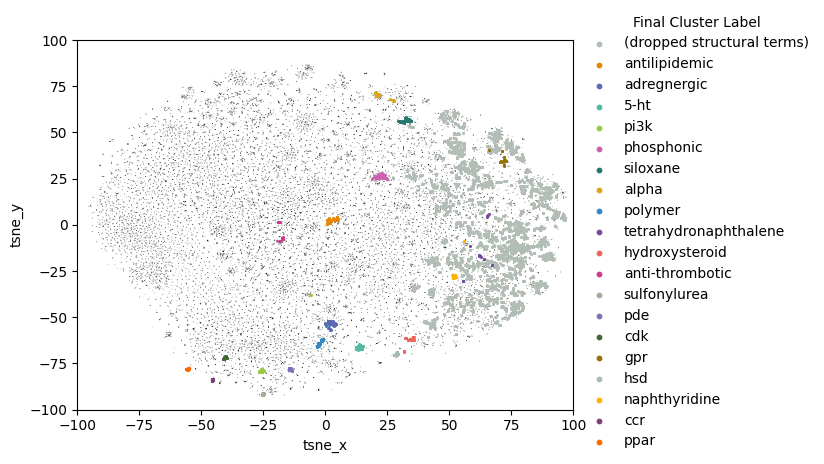

In [33]:
import matplotlib.pyplot as plt


# plot tsne using matplotlib
def plot_tsne(df,):
    plt.clf()    

    plt.scatter(df['label_tsne_x'],
                df['label_tsne_y'],
                c="black",
                alpha=0.5,
                s=0.3,
                edgecolors="none",
    )

    # clusters = [87, 646, 360, 190, 49, 96, 934, 121, 2085, 1399]
    # cluster_names = ["structural", "antilipidemic", "adregnergic", "5-ht", "pi3k", "phosphonic", "siloxane", "alpha", "polymer", "tetrahydronaphthalene" ]
    # colors = ["#636EFA", "#EF553B", "#00CC96", "#AB63FA", "#FFA15A", "#19D3F3", "#FF6692", "#B6E880", "#FF97FF", "#FECB52"]
    # clusters = [646, 360, 190, 49, 96, 934, 121, 2085, 1399, 572, 665, 406, 415, 538, 2574, 860, 1572, 440, 1581, 841]
    clusters = [87, 646, 360, 190, 49, 96, 934, 121, 2085, 1399, 572, 665, 406, 415, 538, 2574, 860, 1572, 440, 1581]
    cluster_names = ["(dropped structural terms)", "antilipidemic", "adregnergic", "5-ht", "pi3k", "phosphonic", "siloxane", "alpha", "polymer", "tetrahydronaphthalene", "hydroxysteroid", "anti-thrombotic", "sulfonylurea", "pde", "cdk", "gpr", "hsd", "naphthyridine", "ccr", "ppar",]
    # cluster_names = ["antilipidemic", "adregnergic", "5-ht", "pi3k", "phosphonic", "siloxane", "alpha", "polymer", "tetrahydronaphthalene", "hydroxysteroid", "anti-thrombotic", "sulfonylurea", "pde", "cdk", "gpr", "hsd", "naphthyridine", "ccr", "ppar", "phosphoramidate" ]
    
    # 20 diff non overlapping colors from ggplot. First color gray
    colors = ["#B2BEB5", "#E58606", "#5D69B1", "#52BCA3", "#99C945", "#CC61B0", "#24796C", "#DAA51B", "#2F8AC4", "#764E9F", "#ED645A", "#CC3A8E", "#A5AA99", "#806EB7", "#3F6833", "#967302", "#A5BDB0", "#FFB300", "#803E75", "#FF6800",]
    
    for cluster, color in zip(clusters, colors):
        plt.scatter(df['label_tsne_x'][df['dbscan'] == cluster],
                    df['label_tsne_y'][df['dbscan'] == cluster],
                    c=color,
                    s=1.5,
                    # edgecolors="none",
                    # edgecolors="black",
                    )

    plt.xlabel("tsne_x")
    plt.ylabel("tsne_y")
    # make legend
    # override legend markers
    for i, color in enumerate(colors):
        plt.scatter([], [], c=color, alpha=1, s=10, label=cluster_names[i])
    
    plt.legend(scatterpoints=1, frameon=False, title='Final Cluster Label', loc='upper right', bbox_to_anchor=(1.5, 1.1),)
    
    # plt.legend(clusters, loc='upper right', bbox_to_anchor=(1.3, 1.0), title="Cluster #")

    plt.xlim(-100, 100)
    plt.ylim(-100, 100)

    plt.savefig("labels_tsne.png", dpi=600, bbox_inches='tight', )


# # plot tsne using matplotlib
# def plot_umap(df,):
#     plt.clf()    
#     plt.scatter(df['label_umap_x'],
#                 df['label_umap_y'],
#                 c="black",
#                 # marker=".",
#                 s=1.5,
#                 edgecolors="none",
#     )
#     plt.xlabel("tsne_x")
#     plt.ylabel("tsne_y")
#     plt.savefig("labels_umap.png", dpi=600, bbox_inches='tight')


plot_tsne(df)
# plot_umap(df)

In [36]:
# fig = px.scatter(
#         x=df["label_umap_x"],
#         y=df["label_umap_y"],
#         # color by dbscan cluster, categorical
#         # color=df["dbscan"].astype(str),    

    
#         opacity=1,
#         size=2,
#         # line={"color": "#000000"}, # black
#     )
# fig.update_layout(
#     plot_bgcolor='rgba(255,255,255,0.1)'
# )
# fig.update_layout(
#     width=1200,
#     height=1200,
#     # autosize=False,
#     margin=dict(l=0, r=0, b=0, t=0, pad=0),
#     # dark theme
#     template="ggplot2",

# )

# # fig.update_layout(showlegend=False)
# fig.write_html(file="labels_umap.html")

ValueError: String or int arguments are only possible when a DataFrame or an array is provided in the `data_frame` argument. No DataFrame was provided, but argument 'size' is of type str or int.

In [35]:
# fig=px.scatter(
#         x=df["label_tsne_x"],
#         y=df["label_tsne_y"],
#         # color by dbscan cluster, categorical
#         # color=df["dbscan"].astype(str),    
#         # hover_data=(df["labels"], df["dbscan"]),
    
#         # opacity=1,
#         # size=2,
#         # line={"color": "#000000"}, # black
#     )
# fig.update_layout(
#     plot_bgcolor='rgba(255,255,255,0.1)'
# )
# fig.update_layout(
#     width=1200,
#     height=1200,
#     # autosize=False,
#     margin=dict(l=0, r=0, b=0, t=0, pad=0),
#     # dark theme
#     template="ggplot2",

# )
# # fig.update_layout(showlegend=False)
# fig.write_html(file="labels_tsne.html")